# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

# **import Data**

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

# **Data Analyzing and Cleaning**

In [3]:
for col in train.columns:
    if train[col].dtypes == object:
      print(col)
      print(train[col].unique())
      


PassengerId
['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet
['Europa' 'Earth' 'Mars' nan]
CryoSleep
[False True nan]
Cabin
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP
[False True nan]
Name
['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


In [4]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


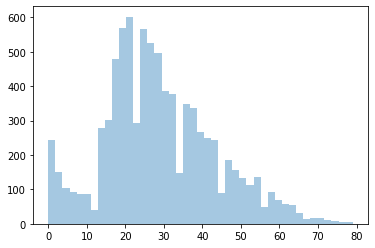

In [5]:
sns.distplot( x=train["Age"], hist=True, kde=False, rug=False )
plt.show()

In [6]:
train.shape,test.shape

((8693, 14), (4277, 13))

In [7]:
print(train.isna().sum())
print('')
print(test.isna().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


In [8]:
for col in train.columns:
    if train[col].isnull().mean()*100>40:
        train.drop(col,axis=1,inplace=True)
    


for col in test.columns:
    if test[col].isnull().mean()*100>40:
        test.drop(col,axis=1,inplace=True)

In [9]:
print(train.dtypes)
print('')
print(test.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


In [10]:
train = train.drop(['Cabin','Name', 'PassengerId'], axis=1)
test_id=test['PassengerId']
test = test.drop(['Cabin','Name', 'PassengerId'], axis=1)

In [11]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [12]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [14]:
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]
imputer = SimpleImputer(strategy='mean' )
imputer.fit(train[imputer_cols])
train[imputer_cols] = imputer.transform(train[imputer_cols])
test[imputer_cols] = imputer.transform(test[imputer_cols])
train["HomePlanet"].fillna('Z', inplace=True)
test["HomePlanet"].fillna('Z', inplace=True)

In [15]:
cateogry_columns=train.select_dtypes(include=['object']).columns.tolist()
for column in train.columns:
    if train[column].isnull().any():
        if(column in cateogry_columns):
            train[column]=train[column].fillna(train[column].mode()[0])



cateogry_columns=test.select_dtypes(include=['object']).columns.tolist()
for column in test.columns:
    if test[column].isnull().any():
        if(column in cateogry_columns):
            test[column]=test[column].fillna(test[column].mode()[0])

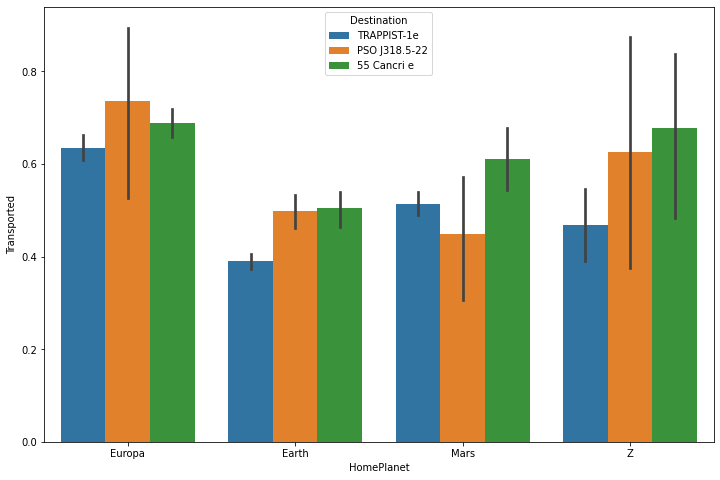

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x='HomePlanet',y='Transported',hue='Destination',data=train)

In [17]:
print(train.isna().sum())
print('')
print(test.isna().sum())

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


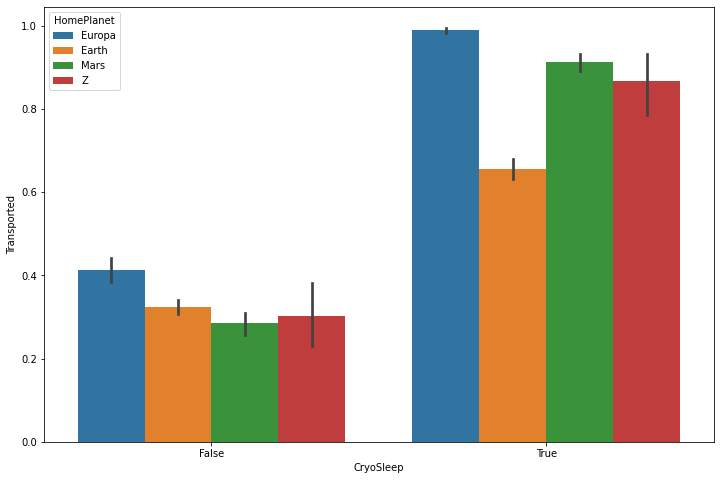

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x='CryoSleep',y='Transported',hue='HomePlanet',data=train)

In [19]:
le=LabelEncoder()
for col in train.columns:
    if train[col].dtypes == object or train[col].dtypes == bool:
        train[col]= le.fit_transform(train[col])



for col in test.columns:
    if test[col].dtypes == object or test[col].dtypes == bool:
        test[col]= le.fit_transform(test[col])

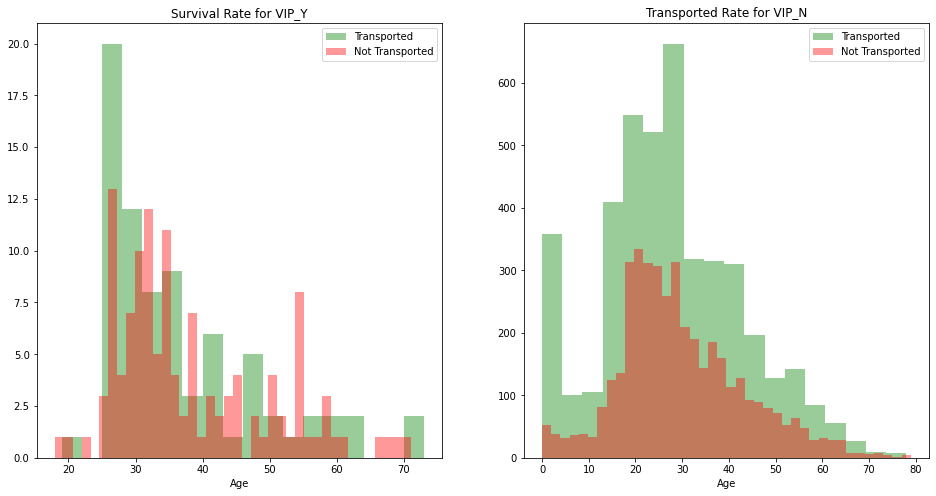

In [20]:
Transported = 'Transported'
not_Transported = 'Not Transported'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
VIP_Y = train[train['VIP']==1]
VIP_N = train[train['VIP']==0]
ax = sns.distplot(VIP_Y[VIP_Y['Transported']==1].Age.dropna(), bins=18, label = Transported, ax = axes[0], kde =False, color="green")
ax = sns.distplot(VIP_Y[VIP_Y['Transported']==0].Age.dropna(), bins=40, label = not_Transported, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Survival Rate for VIP_Y')
ax = sns.distplot(VIP_N[VIP_N['Transported']==1].Age.dropna(), bins=18, label = Transported, ax = axes[1], kde = False, color="green")
ax = sns.distplot(VIP_N[VIP_N['Transported']==0].Age.dropna(), bins=40, label = not_Transported, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Transported Rate for VIP_N');

In [21]:
print(train.dtypes)
print('')
print(test.dtypes)

HomePlanet        int64
CryoSleep         int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

HomePlanet        int64
CryoSleep         int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
dtype: object


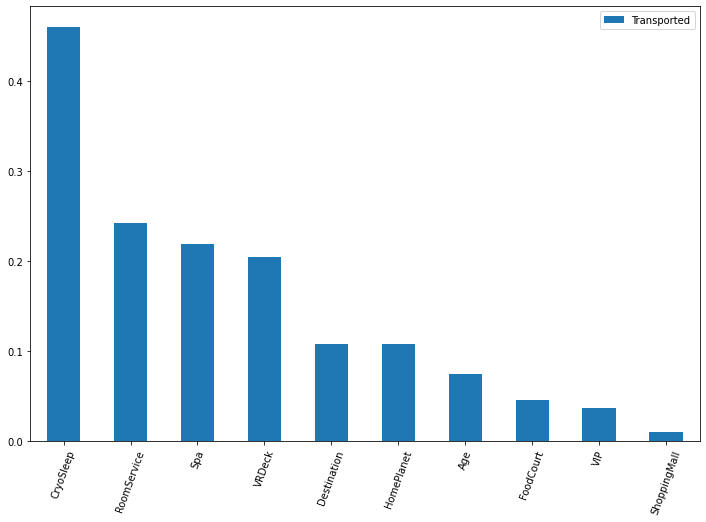

In [22]:
Corr = train.select_dtypes(exclude=["object"]).corr()
abs_corr_on_saleprice = abs(Corr[['Transported']].copy())
abs_corr_on_saleprice.drop('Transported', axis=0, inplace=True)

abs_corr_on_saleprice.sort_values(by='Transported', ascending=False).plot(kind='bar', figsize=(12,8))
plt.xticks(rotation=70)
plt.show()

In [23]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


In [24]:
test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [25]:
X=train.iloc[:,:-1].values
Y=train.iloc[:,-1].values
# test=test.values

In [26]:
X

array([[1.000e+00, 0.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 2.000e+00, ..., 2.500e+01, 5.490e+02,
        4.400e+01],
       [1.000e+00, 0.000e+00, 2.000e+00, ..., 0.000e+00, 6.715e+03,
        4.900e+01],
       ...,
       [0.000e+00, 0.000e+00, 2.000e+00, ..., 1.872e+03, 1.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 3.530e+02,
        3.235e+03],
       [1.000e+00, 0.000e+00, 2.000e+00, ..., 0.000e+00, 0.000e+00,
        1.200e+01]])

In [27]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 0)

# **Scaling**

In [28]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test=sc.transform(test.values)

# **Modeling**

## Predictor 

In [29]:
def acc(classifier,X_test):

    y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix, accuracy_score
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(accuracy_score(y_test, y_pred))



## RandomForestClassifier

In [30]:

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
acc(classifier,X_test)

[[345  93]
 [106 326]]
0.771264367816092


## SVC

In [31]:

classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)
acc(classifier,X_test)

[[336 102]
 [111 321]]
0.7551724137931034


## Kernel SVC

In [32]:

classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)
acc(classifier,X_test)

[[342  96]
 [113 319]]
0.7597701149425288


## Logistic Regression

In [33]:

classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)
acc(classifier,X_test)

[[327 111]
 [ 94 338]]
0.764367816091954


## KNeighborsClassifier

In [34]:

classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
acc(classifier,X_test)

[[330 108]
 [102 330]]
0.7586206896551724


## GaussianNB

In [35]:

classifier = GaussianNB()
classifier.fit(X_train, y_train)
acc(classifier,X_test)

[[195 243]
 [ 34 398]]
0.6816091954022988


## DecisionTreeClassifier

In [36]:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
acc(classifier,X_test)

[[302 136]
 [104 328]]
0.7241379310344828


# **Submission**

In [37]:
y_pred = classifier.predict(test)
submission7 = pd.DataFrame({
        "PassengerId": test_id,
        "Transported": y_pred
    })

submission7["Transported"] = submission7["Transported"].astype(bool)
submission7.Transported.replace({0:False, 1:True})
submission7.to_csv("submission7.csv",index=False)